# Therory

**1. What is a Decision Tree, and how does it work?**  
A Decision Tree is a tree-shaped model used for classification or regression. Internally, each non-leaf node tests one feature (e.g. “Is $X_j \le t$?”). Depending on the outcome, you follow one of its branches. Leaf nodes hold a final prediction (a class label or numeric value). During training, the algorithm picks splits that best reduce impurity (classification) or error (regression) at each node, and recurses until a stopping condition (pure node, minimum samples, or maximum depth).

---

**2. What are impurity measures in Decision Trees?**  
Impurity measures quantify how mixed the target labels are within a node. The two most common for classification are:  

* **Gini Impurity**  
* **Entropy** (a.k.a. Information Entropy)  

---

**3. What is the mathematical formula for Gini Impurity?**     
If a node contains $K$ classes with proportions $p_1, p_2, \dots, p_K$, then  

$$
  \text{Gini} \;=\; 1 - \sum_{k=1}^K p_k^2.
$$

A value of 0 means the node is “pure” (all samples in one class).  

---

**4. What is the mathematical formula for Entropy?**  
For the same node with class proportions $p_1, \dots, p_K$,  

$$
  \text{Entropy} \;=\; - \sum_{k=1}^K p_k \,\log_2\bigl(p_k\bigr),
$$

where we treat $0 \log_2 0$ as 0. Entropy = 0 at a pure node; it’s maximal when classes are evenly split.  

---

**5. What is Information Gain, and how is it used in Decision Trees?**  

* **Definition:** Information Gain = parent node entropy minus weighted average entropy of its child nodes.  
* **Formula (binary split example):**  

  $$
    \text{Gain} 
    = H(\text{parent}) 
    - \Bigl(\tfrac{n_\text{L}}{n} H(\text{left}) + \tfrac{n_\text{R}}{n} H(\text{right})\Bigr).
  $$
* **Usage:** At each node, the algorithm tests all possible feature splits and picks the one that maximizes Information Gain (i.e., most reduces entropy).

---

**6. What is the difference between Gini Impurity and Entropy?**  

* **Gini Impurity:** $1 - \sum p_k^2$. Slightly faster to compute.  
* **Entropy:** $-\sum p_k \log_2 p_k$. Based on log likelihood.
* **Practical effect:** Both measure node impurity. Entropy is more sensitive to changes in class distribution; Gini often yields similar splits and is marginally faster.

---

**7. What is the mathematical explanation behind Decision Trees?**  

1. **At each node**, evaluate every candidate split (feature $j$, threshold $t$).  
2. **Compute impurity** (Gini or entropy) for each child after the split.  
3. **Calculate weighted impurity:**  

   $$
     I_{\text{split}} 
     = \frac{|N_\text{left}|}{|N|} I(N_\text{left}) 
     + \frac{|N_\text{right}|}{|N|} I(N_\text{right}).
   $$
4. **Pick the split** $(j, t)$ that minimizes $I_{\text{split}}$ (equivalently maximizes impurity reduction).
5. **Recurse** on children until stopping criteria (pure node, min samples, max depth).

---

**8. What is Pre-Pruning in Decision Trees?**  
Pre-Pruning (early stopping) halts tree growth during training by applying constraints such as:

* **Maximum depth** (e.g. `max_depth = 3`)
* **Minimum samples to split** (e.g. `min_samples_split = 10`)
* **Minimum samples per leaf** (e.g. `min_samples_leaf = 5`)
* **Minimum impurity decrease** (e.g. `min_impurity_decrease = 0.01`)
  These rules prevent splits that would produce very small or low-gain children, reducing overfitting.

---

**9. What is Post-Pruning in Decision Trees?**  
Post-Pruning grows a full (or deep) tree first, then prunes back subtrees based on a complexity penalty. In CART’s cost-complexity pruning, for each subtree $T$ one defines

$$
  R_\alpha(T) = R(T) \;+\; \alpha \,|\text{leaves}(T)|,
$$

where $R(T)$ is the total impurity (or misclassification error) on training data and $\alpha$ is a penalty. By increasing $\alpha$, you iteratively collapse (prune) nodes that do not sufficiently reduce $R_\alpha(T)$. Finally, cross-validation chooses the best $\alpha$.

---

**10. What is the difference between Pre-Pruning and Post-Pruning?**  

* **Pre-Pruning:** Stop splitting if a node fails a criterion (too deep, too few samples, low impurity decrease). The tree never grows beyond that point.

  * *Pros:* Faster training, simpler.
  * *Cons:* Might cut off beneficial splits early (underfit).
* **Post-Pruning:** Grow a large (possibly overfitted) tree, then prune subtrees based on validation performance or cost-complexity.

  * *Pros:* Allows full tree exploration before pruning → often better generalization.
  * *Cons:* More expensive (grow then prune), uses more memory/time.

---
 
**11. What is a Decision Tree Regressor?**  
A Decision Tree Regressor predicts a continuous target. In each node, it chooses splits that minimize a regression loss (usually Mean Squared Error) in the child nodes. Leaves store the average (or median) target of training samples that reach them. At prediction time, you traverse the tree according to feature tests and output the leaf’s value.

---

**12. What are the advantages and disadvantages of Decision Trees?**  

* **Advantages:**  

  1. **Interpretable:** Easy to visualize and explain (“if… then…” rules).
  2. **Handles numeric & categorical:** Can split natively on both.
  3. **No feature scaling needed:** Splits use value ordering.
  4. **Captures nonlinear interactions** via hierarchical splits.
  5. **Fast inference:** Prediction cost is $O(\text{tree depth})$.

* **Disadvantages:**  

  1. **Overfitting:** Fully grown trees can fit noise.
  2. **High variance:** Small data changes can yield very different trees.
  3. **Bias toward features with many possible splits:** Numeric or high-cardinality features can dominate.
  4. **Unstable under small perturbations.**
  5. **Piecewise constant (regression):** Predictions jump at split boundaries (not smooth).

---

**13. How does a Decision Tree handle missing values?**  

* **Surrogate splits (some implementations):** At training time, find alternate features whose splits mimic the primary split. At prediction, if the primary feature is missing, use the surrogate.
* **Treat “missing” as its own category:** Create a dedicated branch for “feature is missing.”
* **Imputation before training:** Common practice is to fill missing values (mean/median for numeric, mode for categorical) and then build a normal tree.
* **Probabilistic branch assignment (rare):** Distribute a missing-value sample down both child branches weighted by training-set proportions, then average predictions.

Most scikit-learn users simply impute before training, since native surrogate splits are not implemented there.

---

**14. How does a Decision Tree handle categorical features?**  

* **Native categorical splitting (less common in scikit-learn):** Evaluate splits of the form “$X_j \in S$” vs. “$X_j \notin S$” for subsets $S$ of categories, or “$X_j = c_k$” vs. “otherwise.” This can be expensive if many categories exist.
* **One-Hot Encoding (common approach):** Convert each category into a binary column, then let the tree split on “one-hot = 0/1.” This inflates dimensionality but is simple.
* Advanced tree libraries (e.g. LightGBM, CatBoost) implement optimized native handling of categorical variables without explicit one-hot encoding.

---

**15. What are some real-world applications of Decision Trees?**  

1. **Credit scoring:** Approve/decline loans based on applicant features (income, credit history, etc.).
2. **Medical diagnosis:** Classify patients as diseased vs. healthy using symptoms and test results.
3. **Customer churn:** Predict which customers will cancel subscriptions based on usage patterns.
4. **Fraud detection:** Flag transactions as legitimate vs. fraudulent by examining transaction attributes.
5. **Marketing segmentation:** Decide which promotional offer to send based on user demographics and engagement metrics.

# Practical

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Q16

In [22]:
from sklearn.datasets import load_iris,load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x,y = load_iris(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42 )

clf = DecisionTreeClassifier(random_state=31)

clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy of Decision Tree Classifier : {acc:.4f}")

Accuracy of Decision Tree Classifier : 1.0000


### Q17

In [9]:
x,y = load_breast_cancer(return_X_y=True) # load the dataset
feature_names = load_breast_cancer().feature_names
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42 )

clf_gini = DecisionTreeClassifier(criterion='gini', random_state=32)
clf_gini.fit(x_train,y_train)
y_pred = clf_gini.predict(x_test)
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy of Decision Tree Classifier with Gini impurity : {acc:.4f}")

importance = clf_gini.feature_importances_
print("Feature importance with Gini(impurity) :")
for name, imp in zip(feature_names, importance):
    print(f"{name:25s}:{imp:.4f}")

Accuracy of Decision Tree Classifier with Gini impurity : 0.9474
Feature importance with Gini(impurity) :
mean radius              :0.0000
mean texture             :0.0585
mean perimeter           :0.0000
mean area                :0.0000
mean smoothness          :0.0000
mean compactness         :0.0000
mean concavity           :0.0000
mean concave points      :0.6914
mean symmetry            :0.0000
mean fractal dimension   :0.0000
radius error             :0.0120
texture error            :0.0000
perimeter error          :0.0000
area error               :0.0000
smoothness error         :0.0012
compactness error        :0.0000
concavity error          :0.0000
concave points error     :0.0159
symmetry error           :0.0000
fractal dimension error  :0.0266
worst radius             :0.0523
worst texture            :0.0094
worst perimeter          :0.0515
worst area               :0.0000
worst smoothness         :0.0092
worst compactness        :0.0063
worst concavity          :0.0000
wor

### Q18

In [ ]:
# Using previous split as dataset
dt_entropy = DecisionTreeClassifier(criterion="entropy", random_state=48)
dt_entropy.fit(x_train, y_train)

y_pred = dt_entropy.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print(f"Decision Tree (Entropy) accuracy: {acc}")

Decision Tree (Entropy) accuracy: 0.956140350877193


### Q19

In [18]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

x,y = fetch_california_housing(return_X_y=True)
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=40 )

dt_regressor = DecisionTreeRegressor(random_state=36)
dt_regressor.fit(x_train,y_train)
y_pred = dt_regressor.predict(x_test)
score = mean_squared_error(y_test,y_pred)

print(f"Decision Tree Regressor MSE (California Housing): {score:.5f}")

Decision Tree Regressor MSE (California Housing): 0.53066


### Q20

In [ ]:
import graphviz
from sklearn.tree import export_graphviz,DecisionTreeClassifier

data = load_iris()
X, y = data.data, data.target
feature_names = data.feature_names
class_names = data.target_names


dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X, y)

dt_data = export_graphviz(
    dt,
    out_file=None,
    feature_names=feature_names,
    class_names=class_names,
    filled=True,
    rounded=True,
    special_characters=True
)

graph = graphviz.Source(dt_data)
graph.render(filename='iris_descision_tree',format='pdf',cleanup=True)
print('Exported the Graph !!')

### Q21

In [26]:
x,y = load_breast_cancer(return_X_y=True) 
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42 )

dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(x_train, y_train)
y_pred_pruned = dt_pruned.predict(x_test)
acc_pruned = accuracy_score(y_test, y_pred_pruned)

# 4. Train fully grown tree (no depth limit)
dt_full = DecisionTreeClassifier(random_state=48)
dt_full.fit(x_train, y_train)
y_pred_full = dt_full.predict(x_test)
acc_full = accuracy_score(y_test, y_pred_full)

print(f"Accuracy (max_depth=3): {acc_pruned}")
print(f"Accuracy (fully grown tree): {acc_full}")

Accuracy (max_depth=3): 0.9473684210526315
Accuracy (fully grown tree): 0.9473684210526315


### Q22

In [28]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(x_train, y_train)
y_pred_default = dt_default.predict(x_test)
acc_default = accuracy_score(y_test, y_pred_default)

# Tree with min_samples_split=5
dt_split5 = DecisionTreeClassifier(min_samples_split=5, random_state=42)
dt_split5.fit(x_train, y_train)
y_pred_split5 = dt_split5.predict(x_test)
acc_split5 = accuracy_score(y_test, y_pred_split5)

print(f"Accuracy (default tree):      {acc_default}")
print(f"Accuracy (min_samples_split=5): {acc_split5}")

Accuracy (default tree):      0.9473684210526315
Accuracy (min_samples_split=5): 0.9385964912280702


### Q23

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


# Train on raw (unscaled) data
dt_raw = DecisionTreeClassifier(random_state=42)
dt_raw.fit(x_train, y_train)
y_pred_raw = dt_raw.predict(x_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

# Train with StandardScaler in pipeline
pipeline_scaled = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("dt", DecisionTreeClassifier(random_state=42))
])
pipeline_scaled.fit(x_train, y_train)
y_pred_scaled = pipeline_scaled.predict(x_test)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"Accuracy on raw data:        {acc_raw}")
print(f"Accuracy on standardized data: {acc_scaled}")

Accuracy on raw data:        0.9473684210526315
Accuracy on standardized data: 0.9473684210526315


### Q24

In [34]:
from sklearn.multiclass import OneVsRestClassifier

#Load Iris dataset
data = load_iris()
X, y = data.data, data.target

#Split into train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Wrap DecisionTree inside OvR
ovo_dt = OneVsRestClassifier(
    estimator=DecisionTreeClassifier(random_state=42)
)
ovo_dt.fit(X_train, y_train)

# Predict and evaluate
y_pred = ovo_dt.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"OvR Decision Tree accuracy: {acc}\n")


OvR Decision Tree accuracy: 0.9666666666666667



### Q25

In [35]:
feature_names = load_iris().feature_names

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X, y)

importances = dt.feature_importances_
print("Feature Importance Scores:")
for name, imp in zip(feature_names, importances):
    print(f"{name:20s}: {imp:.4f}")

Feature Importance Scores:
sepal length (cm)   : 0.0133
sepal width (cm)    : 0.0000
petal length (cm)   : 0.5641
petal width (cm)    : 0.4226


### Q26

In [36]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X, y = housing.data, housing.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dtr_depth5 = DecisionTreeRegressor(max_depth=5, random_state=42)
dtr_depth5.fit(X_train, y_train)
y_pred_5 = dtr_depth5.predict(X_test)
mse_5 = mean_squared_error(y_test, y_pred_5)

dtr_full = DecisionTreeRegressor(random_state=42)
dtr_full.fit(X_train, y_train)
y_pred_full = dtr_full.predict(X_test)
mse_full = mean_squared_error(y_test, y_pred_full)

print(f"MSE (max_depth=5):     {mse_5:.4f}")
print(f"MSE (unrestricted):    {mse_full:.4f}")


MSE (max_depth=5):     0.5245
MSE (unrestricted):    0.4997


### Q27

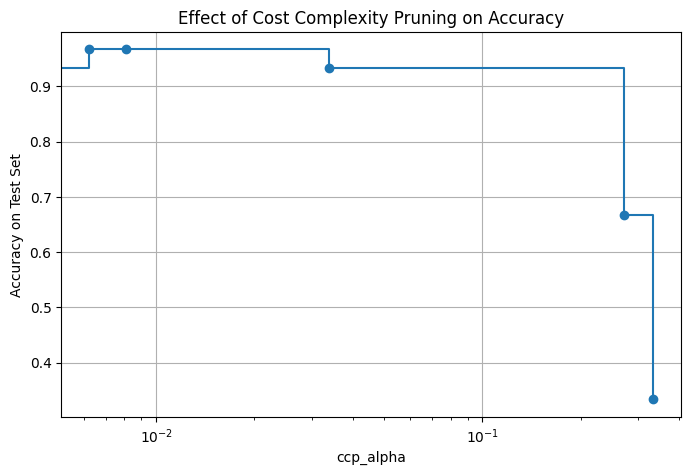

Best ccp_alpha: 0.006250  →  Accuracy: 0.9667


In [37]:
data = load_iris()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dt_full = DecisionTreeClassifier(random_state=42)
path = dt_full.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# 4. Train a series of trees with different ccp_alpha and record test accuracy
acc_list = []
for alpha in ccp_alphas:
    dt = DecisionTreeClassifier(ccp_alpha=alpha, random_state=42)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc_list.append(accuracy_score(y_test, y_pred))

# 5. Plot accuracy vs. alpha
plt.figure(figsize=(8, 5))
plt.plot(ccp_alphas, acc_list, marker="o", drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy on Test Set")
plt.title("Effect of Cost Complexity Pruning on Accuracy")
plt.xscale("log")
plt.grid(True)
plt.show()

# 6. Print the alpha that gives highest accuracy
best_idx = np.argmax(acc_list)
print(f"Best ccp_alpha: {ccp_alphas[best_idx]:.6f}  →  Accuracy: {acc_list[best_idx]:.4f}")


### Q28

In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-Score:  {f1:.4f}\n")



Precision: 0.9559
Recall:    0.9028
F1-Score:  0.9286



### Q29

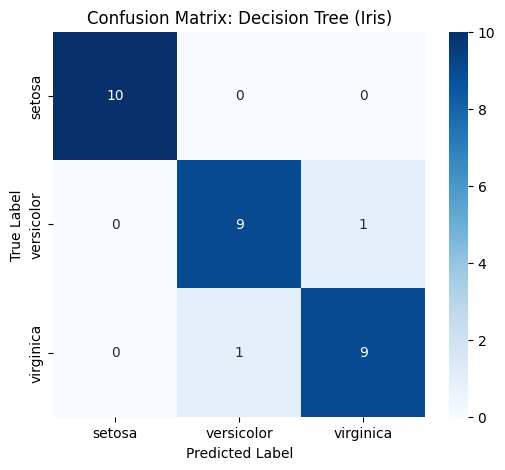

In [40]:
from sklearn.metrics import confusion_matrix

data = load_iris()
X, y = data.data, data.target
class_names = data.target_names


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)


y_pred = dt.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix: Decision Tree (Iris)")
plt.show()


### Q30

In [41]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "max_depth": [None, 2, 3, 4, 5, 6],
    "min_samples_split": [2, 5, 10, 20]
}

dt_base = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt_base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

print("Best parameters found:")
print(grid_search.best_params_)
print(f"Best cross-validated accuracy: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters found:
{'max_depth': None, 'min_samples_split': 2}
Best cross-validated accuracy: 0.9417
